In [1]:
import shap
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
model.eval()

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: yiyanghkust/finbert-tone
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [3]:
news_df = pd.read_csv("C:\\Users\\ayush\\OneDrive\\Desktop\\alphagaze\\data\\IN-FINews Dataset.csv")
samples = news_df["Title"].dropna().sample(3, random_state=42).tolist()


In [4]:
def finbert_predict(texts):
    import numpy as np
    scores = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=256)
        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        scores.append(probs[0][0].item() - probs[0][1].item())
    return np.array(scores)


  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [00:27<00:00,  8.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [01:02, 20.83s/it]                       


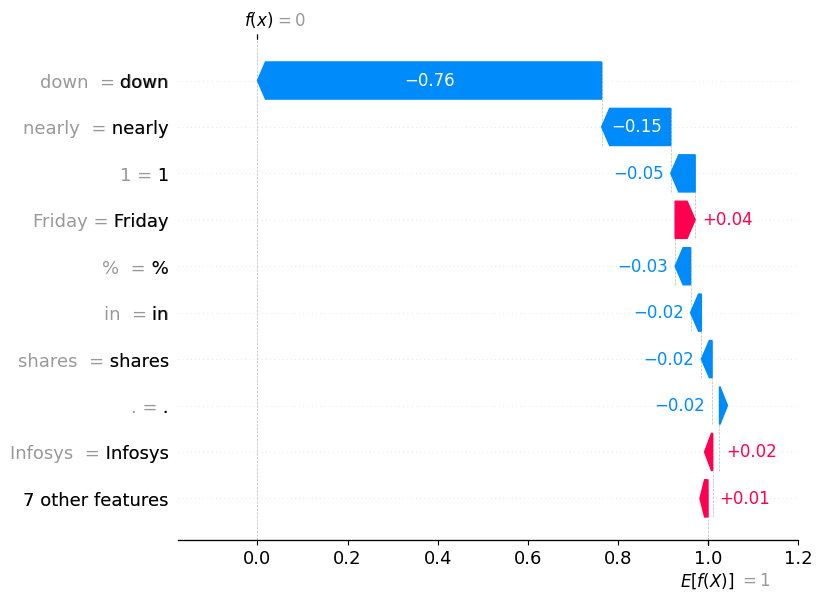

In [8]:
explainer = shap.Explainer(
    finbert_predict,
    masker=shap.maskers.Text(tokenizer)
)

shap_values = explainer(samples)
shap.plots.text(shap_values[0])
shap.plots.waterfall(shap_values[0])
